In [52]:
from math import sqrt, factorial, pi
from fractions import Fraction
import numpy as np
from scipy.special import erfinv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import zip_longest
plt.style.use('seaborn')
%matplotlib inline

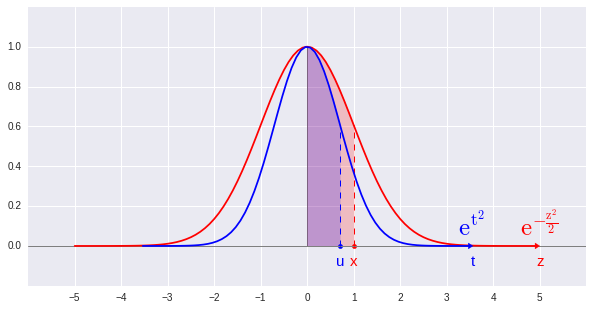

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(0, color='tab:gray', lw=1, zorder=1)
ax.vlines(0, 0, 1, color='tab:gray', lw=1, zorder=1)

x = 1
z = np.arange(-5, 5, 0.1)
z_plus = np.arange(0, x+0.001, 0.1)

u = x/sqrt(2)
t = np.arange(-5/sqrt(2), 5/sqrt(2), 0.1)
t_plus = np.arange(0, u, 0.1)

ax.plot(z, np.exp(-z**2/2), color='red')
ax.fill_between(z_plus, 0, np.exp(-z_plus**2/2), color='red', alpha=0.2)
ax.arrow(z[-1]-0.1, 0, 0.1, 0, color='red', head_width=0.03, head_length=0.1)
ax.text(z[-1]+0.1, -0.1, 'z', color='red', horizontalalignment='center', fontsize=15)
ax.scatter(x, 0, color='red')
ax.vlines(x, 0, np.exp(-x**2/2), linestyle='--', linewidth=1, color='red')
ax.text(x, -0.1, 'x', color='red', horizontalalignment='center', fontsize=15)

ax.plot(t, np.exp(-t**2), color='blue')
ax.fill_between(t_plus, 0, np.exp(-t_plus**2), color='blue', alpha=0.2)
ax.arrow(t[-1]-0.1, 0, 0.1, 0, color='blue', head_width=0.03, head_length=0.1, zorder=10)
ax.text(t[-1]+0.1, -0.1, 't', color='blue', horizontalalignment='center', fontsize=15)
ax.scatter(u, 0, color='blue')
ax.vlines(u, 0, np.exp(-u**2), linestyle='--', linewidth=1, color='blue')
ax.text(u, -0.1, 'u', color='blue', horizontalalignment='center', fontsize=15)

ax.set_xticks(range(-5, 6))
ax.set_yticks(np.arange(0, 1.01, 0.2))

ax.text(5, 0.05, r'$\mathrm{e^{-\frac{z^{2}}{2}}}$', color='red', fontsize=25, horizontalalignment='center')
ax.text(5/sqrt(2), 0.05, r'$\mathrm{e^{t^{2}}}$', color='blue', fontsize=25, horizontalalignment='center')
plt.show()

In [9]:
def update_p(p, n):
    dp = [power * coeff for power, coeff in enumerate(p)][1:]
    pf = [0] + p
    two_npf = [2*n*coeff for coeff in pf]
    updated_p = [dp_coeff + two_npf_coeff for dp_coeff, two_npf_coeff in zip_longest(two_npf, dp, fillvalue=0)]
    return updated_p

In [55]:
taylor_coeffs = [0, sqrt(pi)/2]
p = [0, 2]
for n in range(2, 50):
    const = p[0]
    fraction_coeff = Fraction(const, (factorial(n) * 2**n))
    taylor_coeff = fraction_coeff * sqrt(pi)**n
    taylor_coeffs.append(taylor_coeff)
    p = update_p(p, n)
#     print(fraction_coeff)

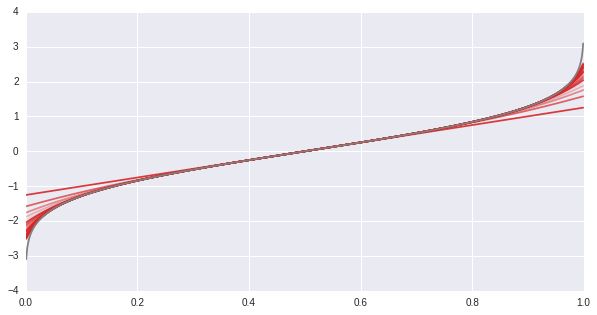

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))
a = np.arange(0.001, 1, 0.001)
b = 2*a - 1
x = np.zeros(len(a))

for power, coeff in enumerate(taylor_coeffs):
    x += sqrt(2) * (coeff * b**power)
    if power%2 != 0:
        ax.plot(a, x, color='tab:red', alpha=(1-0.1*power))
ax.plot(a, sqrt(2) * erfinv(b), color='tab:gray')

In [71]:
power

49